In [ ]:
import keras
from keras.datasets import cifar10

In [ ]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

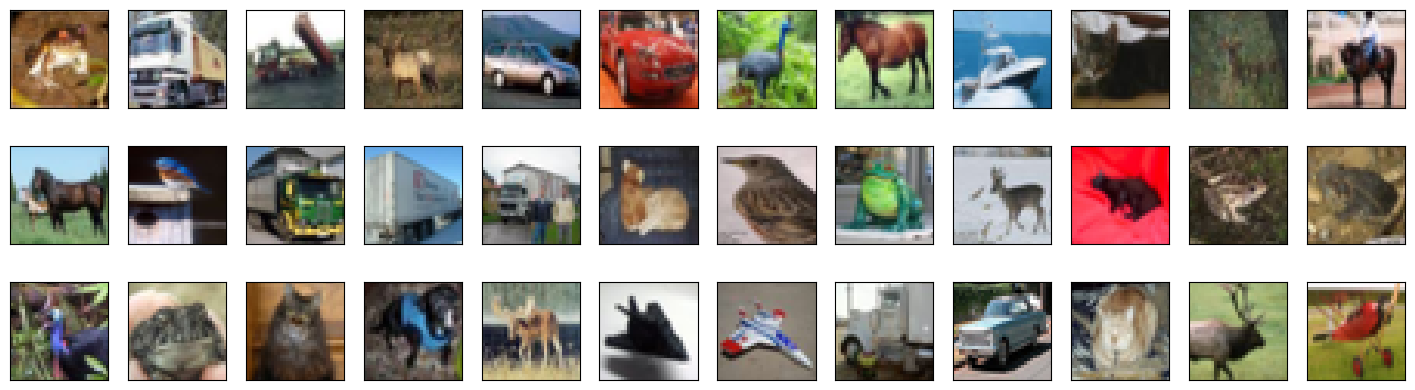

In [ ]:
fig=plt.figure(figsize=(18,5))
for i in range(36):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [ ]:
from keras import utils
from tensorflow import keras

In [ ]:
num_classes=len(np.unique(Y_train))
Y_train=utils.to_categorical(Y_train,num_classes)
Y_test=utils.to_categorical(Y_test,num_classes)
(X_train,X_valid)=X_train[5000:],X_train[:5000]
(Y_train,Y_valid)=Y_train[5000:],Y_train[:5000]
print("x_train shape: ",X_train.shape)
print("x_train sample: ",X_train.shape[0])
print("x_test sample: ",X_test.shape[0])
print("x_valid sample: ",X_valid.shape[0])

x_train shape:  (45000, 32, 32, 3)
x_train sample:  45000
x_test sample:  10000
x_valid sample:  5000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D


In [ ]:
model=Sequential()
model.add(Conv2D(16,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_valid,Y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.85498, saving model to model.weights.best.hdf5
1407/1407 - 66s - loss: 0.8938 - accuracy: 0.6846 - val_loss: 0.8550 - val_accuracy: 0.6992 - 66s/epoch - 47ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.85498 to 0.83077, saving model to model.weights.best.hdf5
1407/1407 - 66s - loss: 0.8414 - accuracy: 0.7011 - val_loss: 0.8308 - val_accuracy: 0.7232 - 66s/epoch - 47ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.83077 to 0.78578, saving model to model.weights.best.hdf5
1407/1407 - 65s - loss: 0.7887 - accuracy: 0.7219 - val_loss: 0.7858 - val_accuracy: 0.7272 - 65s/epoch - 46ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.78578
1407/1407 - 66s - loss: 0.7507 - accuracy: 0.7364 - val_loss: 0.8015 - val_accuracy: 0.7284 - 66s/epoch - 47ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.78578 to 0.74293, saving model to model.weights.best.hdf5
1407/1407 - 64s - loss: 0.7168 - accuracy: 0.7469 - val_loss: 0.7429 - val_accuracy: 0.7434 - 64s/epoch - 45ms/step
Epoch 6/10

Epoch 6: val_loss improved from 0.74293 to 0.73781, saving model to model.weights.best.hdf5
1407/1407 - 64s - loss: 0.6873 - accuracy: 0.7571 - val_loss: 0.7378 - v

In [ ]:
y_pred=model.predict(X_test)
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 5s 15ms/step


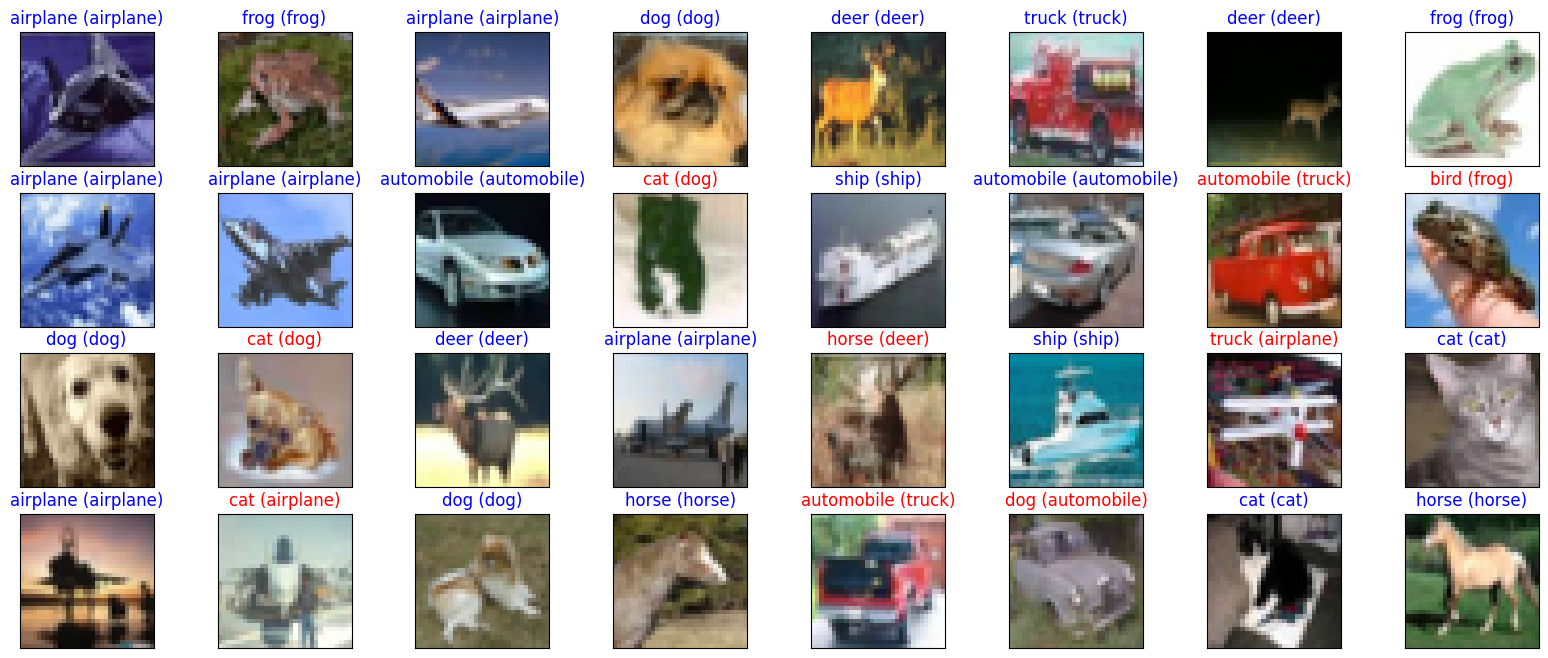

In [ ]:
fig=plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx=np.argmax(y_pred[idx])
  true_idx=np.argmax(Y_test[idx])
  ax.set_title("{} ({})".format(labels[pred_idx],labels[true_idx]),color=('blue' if pred_idx==true_idx else 'red'))

In [ ]:
model.load_weights('model.weights.best.hdf5')
score=model.evaluate(X_test,Y_test,verbose=0)
accuracy=100*score[1]
print("Test accuracy: ",accuracy)

Test accuracy:  74.26000237464905
